# Create experiments dictioary to store information for all samples

 "Sample": [scan file, sample start pos, sample end pos, test type, notes]

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob, os
import pickle
from nexusformat.nexus import *

In [2]:
Samples = {"Zr4_RD_FC_BB_fullrings": [108727, None, 108728, 1050, "8% Strain", "Pilatus at 1050mm, beam normal to sample ND"],
          "Zr4_RD_AC_BA_fullrings": [108730, 108729, 108729, 1050, "8% Strain", "Pilatus at 1050mm, beam normal to sample ND"],
          "Zr4_RD_FC_BC_far": [None, None, None, 2350, "8% Strain", "Pilatus at 2350mm, beam normal to sample ND"],
          "Zr4_RD_AC_AD_far": [108799, None, None, 2350, "8% Strain", "Pilatus at 2350mm, beam normal to sample ND"],
          "Zr4_RD_WQ_DE_far": [108796, None, None, 2350, "8% Strain", "Pilatus at 2350mm, beam normal to sample ND"],
          "Zr4_TD_FC_XX_far": [108877, None, None, 2350, "8% Strain", "Pilatus at 2350mm, beam normal to sample ND"],
          "Zr4_TD_AC_XX_far": [108875, None, None, 2350, "8% Strain", "Pilatus at 2350mm, beam normal to sample ND"], 
          "Zr4_TD_WQ_MC_far": [108800, None, None, 2350, "8% Strain", "Pilatus at 2350mm, beam normal to sample ND"], 
          "Zr4_RD_WQb_90deg_DE": [108906, None, None, 2350, "8% Strain", "Pilatus at 2350mm, beam paralell to sample ND"],
          "Zr4_RD_FC_90deg_AE": [108920, None, None, 2350, "8% Strain", "Pilatus at 2350mm, beam paralell to sample ND"],
          "Zr4_RD_AC_90deg_AA": [108921, None, None, 2350, "8% Strain", "Pilatus at 2350mm, beam paralell to sample ND"],
          "Zr4_TD_WQ_90deg_OD": [108909, None, None, 2350, "8% Strain", "Pilatus at 2350mm, beam paralell to sample ND"],
          "Zr4_TD_FC_90deg_#5": [108922, None, None, 2350, "8% Strain", "Pilatus at 2350mm, beam paralell to sample ND"],
          "Zr4_TD_AC_90deg_#5": [108928, 108923, None, 2350, "8% Strain", "Pilatus at 2350mm, beam paralell to sample ND"],
          "Zr4_TD_0ppm": [108878, None, None, 2350, "8% Strain", "Test on Uncharged Zr4 material, Pilatus at 2350mm, beam normal to sample ND"],
          "Zr4_8%_250C_KA": [108734, None, None, 1050, "8% Strain at 250degC", "Pilatus at 1050mm, beam normal to sample ND"],
          "Zr4_8%_270C_KB": [108736, None, None, 1050, "8% Strain at 270degC", "Pilatus at 1050mm, beam normal to sample ND"],
          "Zr4_8%_280C_MB": [108741, None, None, 1050, "8% Strain at 280degC", "Pilatus at 1050mm, beam normal to sample ND. Thermocouple fell off sample"],
          "Zr4_8%_290C_JC": [108738, None, None, 1050, "8% Strain at 290degC", "Pilatus at 1050mm, beam normal to sample ND"],
          "Zr4_8%_310C_MA": [108739, None, None, 1050, "8% Strain at 310degC", "Pilatus at 1050mm, beam normal to sample ND"],
          "Zr4_8%_330C_IB": [108737, None, None, 1050, "8% Strain at 330degC", "Pilatus at 1050mm, beam normal to sample ND"],
          "Zr4_Reori_NB_FAST": [108753, 108751, None, 2350, "8% Strain - re-oriented hydrides", "INSTRON Method error - strain rate = 0.1666%/s"],
          "Zr4_Reori_LA_FAIL": [108743, 108742, None, 2350, "8% Strain - re-oriented hydrides", "Sample failed under heating as load was applied to soon"],
          "Zr4_Reori_HC_FAIL": [108746, 108745, None, 2350, "8% Strain - re-oriented hydrides", "Sample failed under heating as load was applied to soon"],
          "Zr4_Reori_LD_FAIL": [108755, 108754, None, 2350, "8% Strain - re-oriented hydrides", "Sample failed under heating as load was applied to soon"],
          "Zr4_Reori_LC_2mincool": [108794, 108793, None, 2350, "8% Strain - re-oriented hydrides", "450degC temperature soak and cool over 2 minutes once load of 175MPa was applied"],
          "Zr4_Reori_LB_5mincool": [108879, None, None, 2350, "8% Strain - re-oriented hydrides", "450degC temperature soak and cool over 5 minutes once load of 175MPa was applied"],
          "Zr4_Reori_LB_20mincool": [108880, None, None, 2350, "8% Strain - re-oriented hydrides", "450degC temperature soak and cool over 20 minutes once load of 175MPa was applied"],
          "Zr4_Reori_AZ_60mincool": [108904, 108904, None, 2350, "8% Strain - re-oriented hydrides", "450degC temperature soak and cool over 60 minutes once load of 175MPa was applied"],
          "Zr4_Reori_AF_lowppm": [108890, None, None, 2350, "8% Strain - re-oriented hydrides low ppm sample", "A blistered sample was used as this has lower Hppm"],
          "Zr4_LAL_450_JB": [108802, None, None, 2350, "Load-450C-anneal-load", "1000 frames run - diffraction re-started once 1000 reached see: Zr4_LAL_450_JB_unload"],
          "Zr4_LAL_450_JB_unload": [108803, None, None, 2350, "Load-450C-anneal-load", "See notes: Zr4_LAL_450_JB"],
          "Zr4_LAL_650_IA": [108804, None, None, 2350, "Load-650C-anneal-load", "Anneal at 650degC"],
          "PuerZr_WQ_400_1mm_#1": [108860, None, None, 2350, "8% PureZr", "Pilatus at 2350mm, beam normal to sample ND. No position control macro implemented - take extreme care if attempting to compare peak intensity as sample will move during test"],
          "PuerZr_WQ_400_1mm_#2": [108866, None, None, 2350, "8% PureZr", "see notes: PuerZr_WQ_400_1mm_#1"],
          "PureZr_90deg_WQ_400ppm_1mm_#5": [108917, None, None, 2350, "8% PureZr", "Beam paralell to sample ND. see notes: PuerZr_WQ_400_1mm_#1"],
          "PureZr_FC_200ppm_1mm_A": [108871, None, None, 2350, "8% PureZr", "see notes: PuerZr_WQ_400_1mm_#1"],
          "PureZr_FC_200ppm_1mm_#6": [108871, None, None, 2350, "8% PureZr", "see notes: PuerZr_WQ_400_1mm_#1"]
          }

Single_images = {"Zr4_Reori_LD_500C-check": [108756, None, None, "Hydrides not dissolving", "Hydride peaks still visible at 450degC so temperature was increased to ensure complete dissolution - the peaks were still visible at 550degC. It was assumed there must be a blister on the sample surface"],
                 "Zr4_Reori_LD_yposchange_450C": [108758, None, None, "Hydrides not dissolving, change position", "See notes: Zr4_Reori_LD_500C-check. Change of position to avoid blister. No difference"],
                 "Zr4_Reori_LD_550C-check": [108759, None, None, "Hydrides not dissolving 550degC", "See notes: Zr4_Reori_LD_500C-check & Zr4_Reori_LD_yposchange_450C. Peaks still visible at 550deC. Sample changed."],
                 "PureZr_FC_200ppm_1mm_#5": [108889, 108887, 108888, "8% PureZr", "Attempt to observe clearer 220 & 311 peaks but can't see them. No test performed. see notes: PuerZr_WQ_400_1mm_#1"],
                 "Amina_Zr4_4%Nb": [108891, None, None, "Amina_Zr4_4%Nb", ""],
                 "Amina_Zr4_5%Nb": [108892, None, None, "Amina_Zr4_5%Nb", ""],
                 "Amina_Zr4_8%Nb": [108893, None, None, "Amina_Zr4_8%Nb", ""],
                 "Rolled_Zr4_2.5%Nb": [108898, 108897, None, "Rolled_Zr4_2.5%Nb", "Test for Amina/ C.Daniel - heat sample to observe phase change. Thermocouple felloff during cooling at approx 700degC"],
                 "Rolled_Zr4_7%Nb": [108901, None, None, "Rolled_Zr4_7%Nb", "Test for Amina/ C.Daniel - heat sample to observe phase change."],
                 "air_scatter": [108801, None, None, 2350, "air scatter", "air scatter"]
                }

In [4]:
with open('Diamond_experiments.pkl', 'wb') as f:
    pickle.dump(Samples, f)

In [3]:
# Define paths
data_dir = r'Z:\Diamond_MG28894-1_DATA_BACKUP\rawdata'
cal_dir = r"Z:\Diamond_MG28894-1_DATA_BACKUP\processing"
ponifile_1050mm = cal_dir + "\MG28894-1_poni_1050.poni"
ponifile_2350mm = cal_dir + "\MG28894-1_poni_2350.poni"
ponifile_750mm = cal_dir + "\MG28894-1_poni_750.poni"

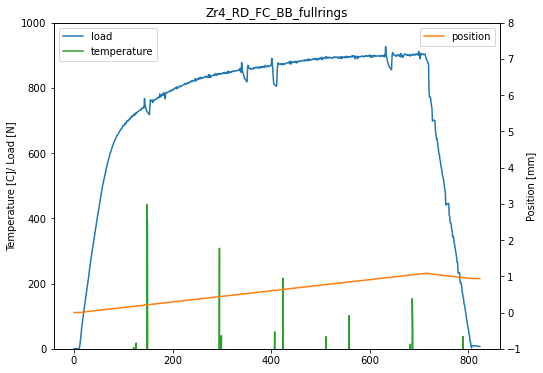

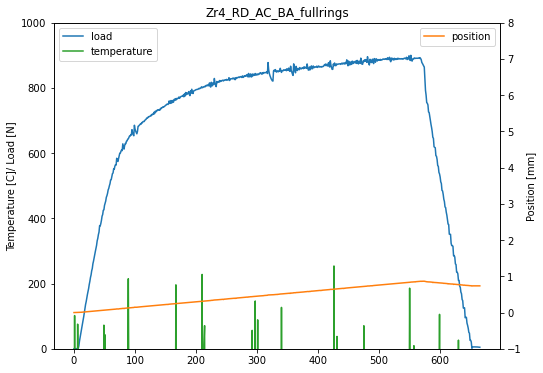

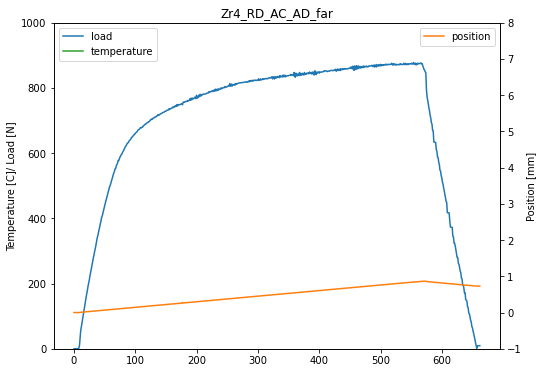

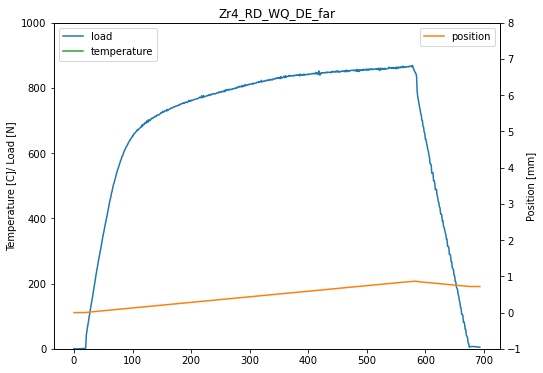

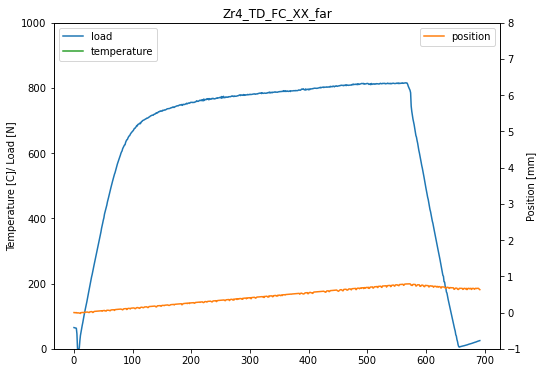

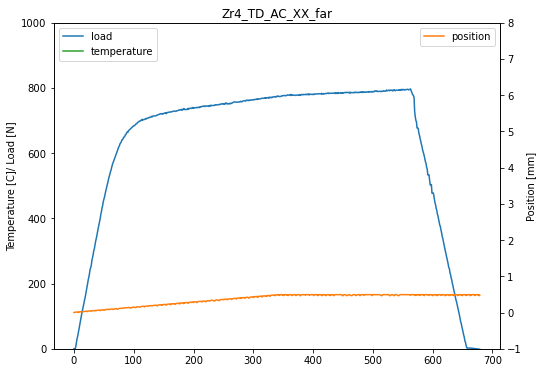

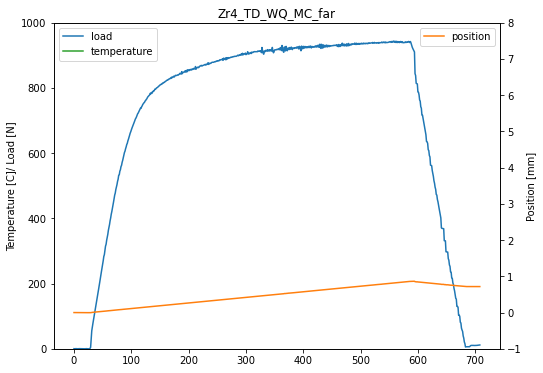

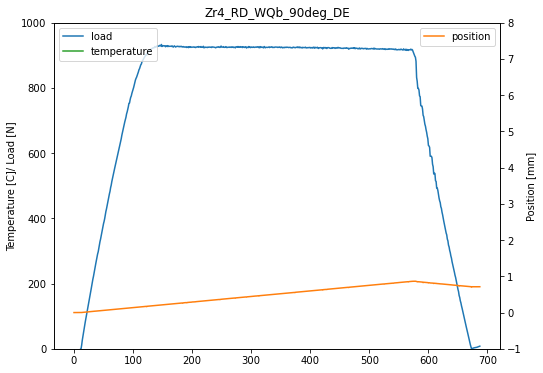

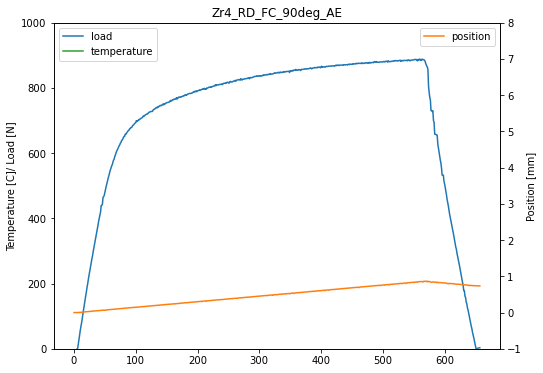

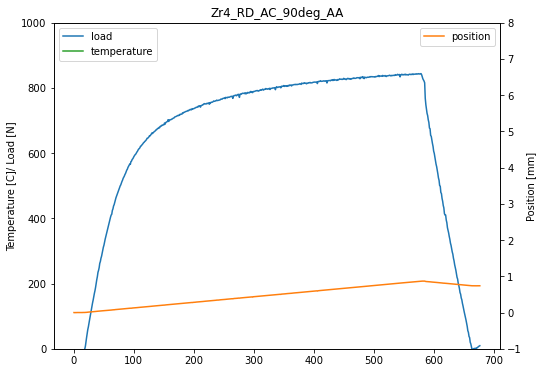

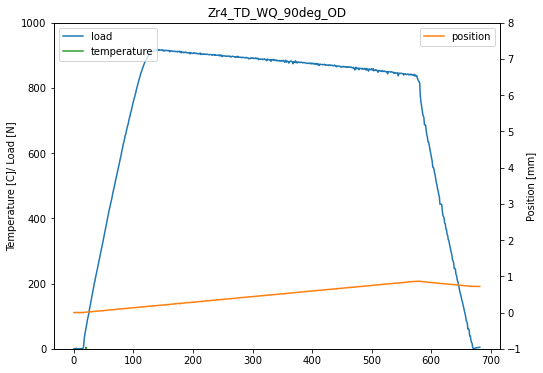

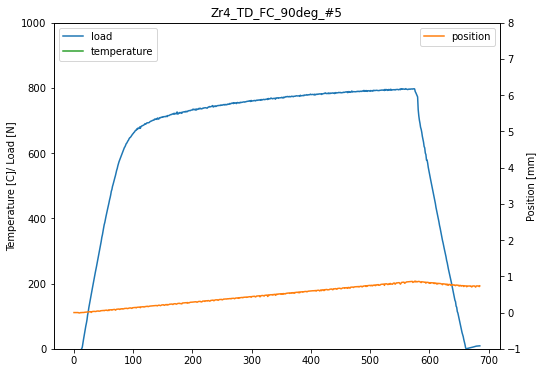

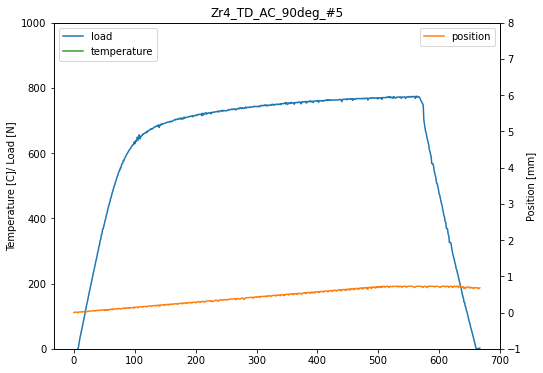

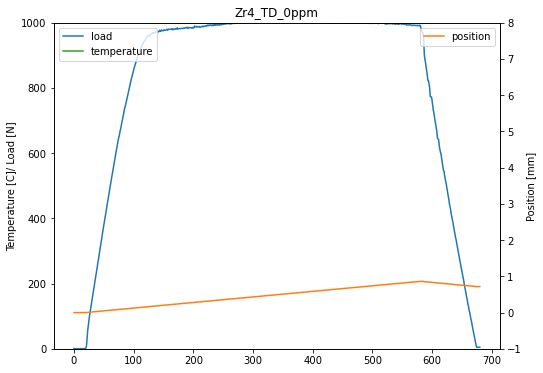

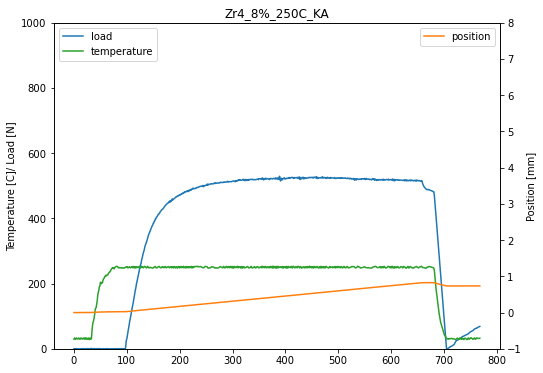

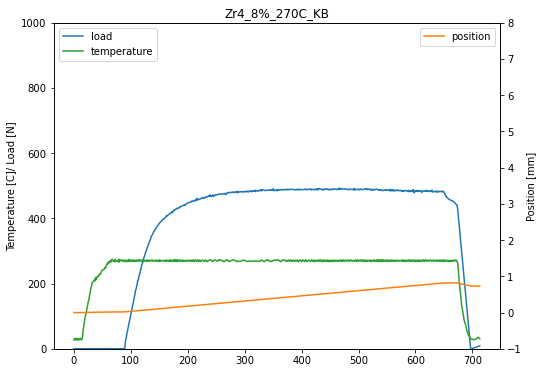

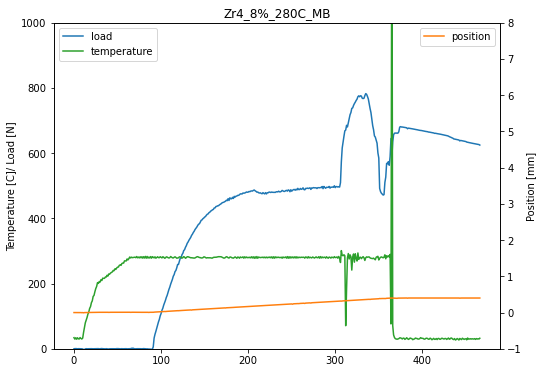

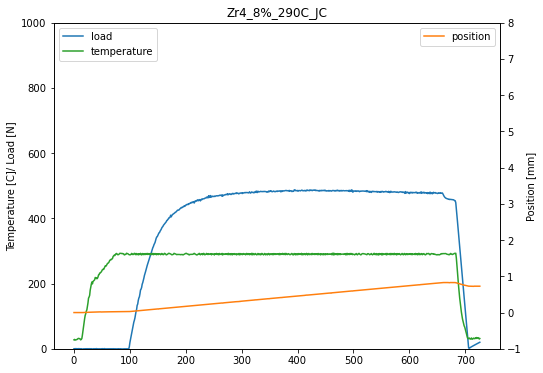

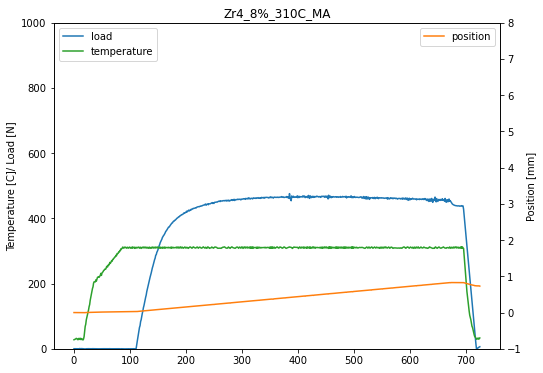

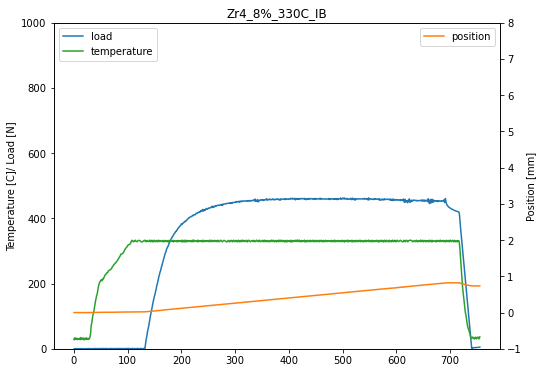

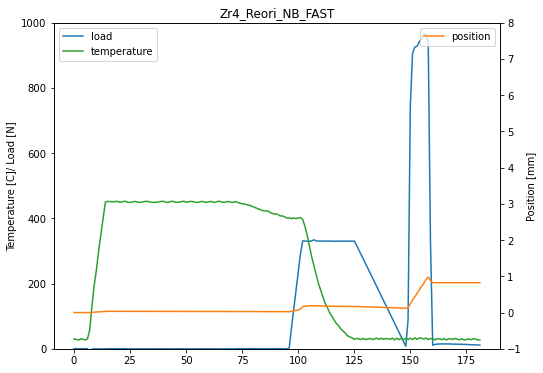

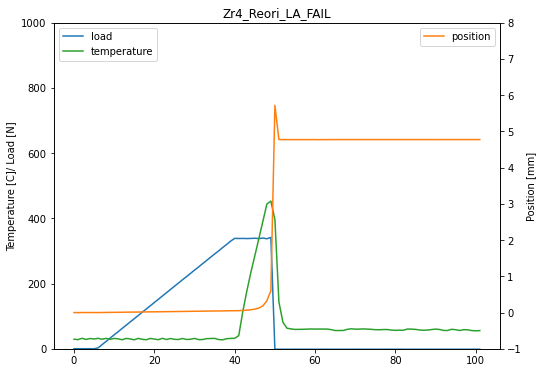

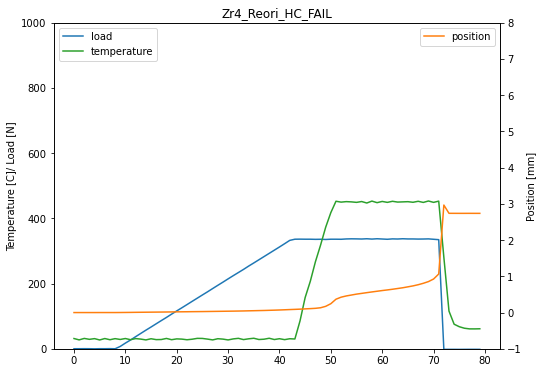

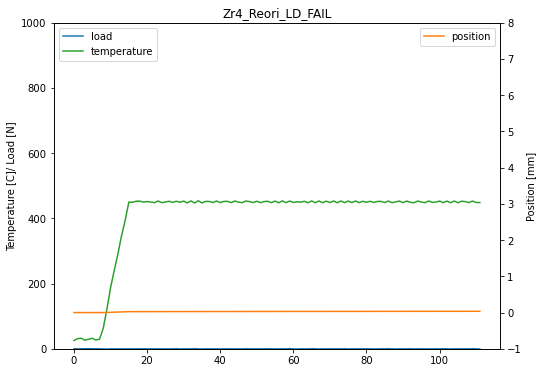

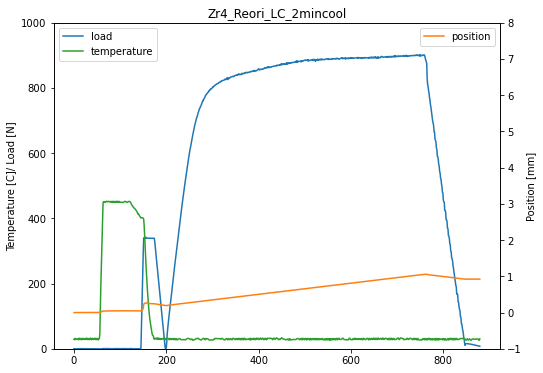

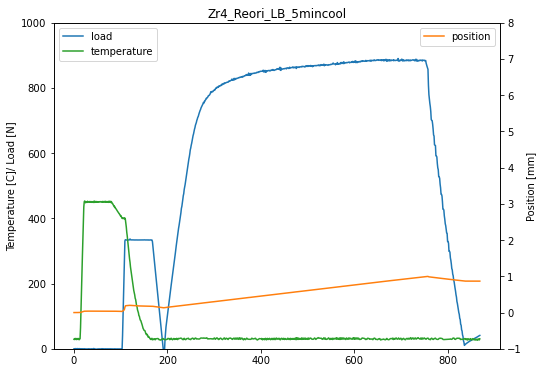

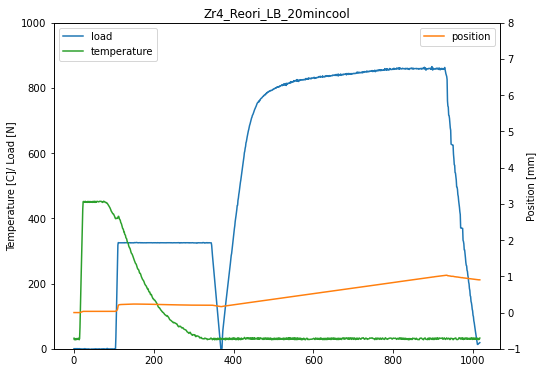

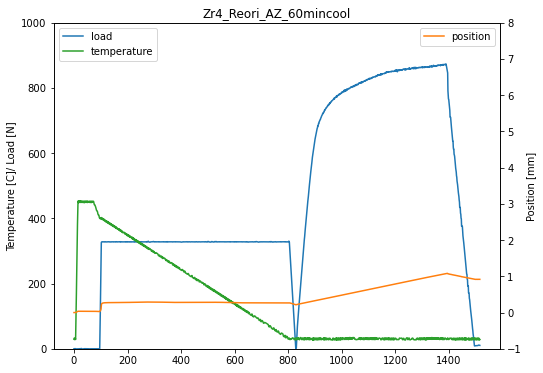

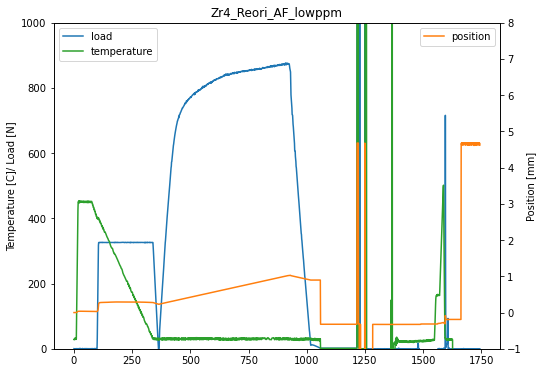

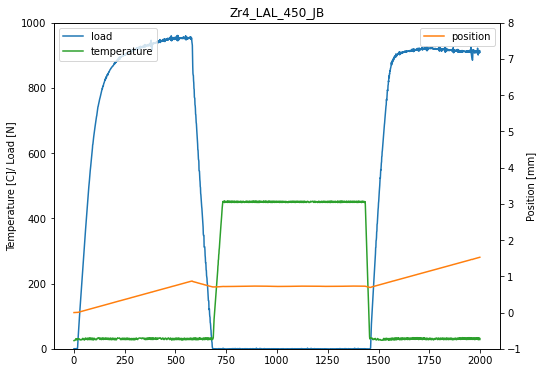

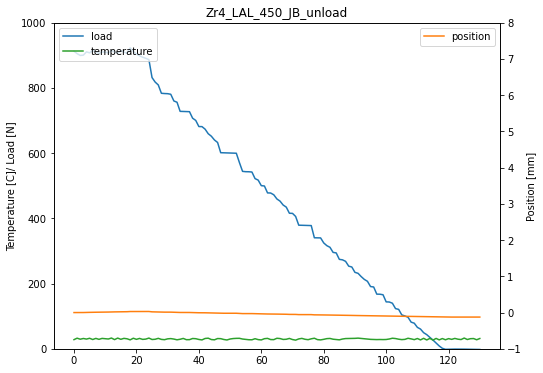

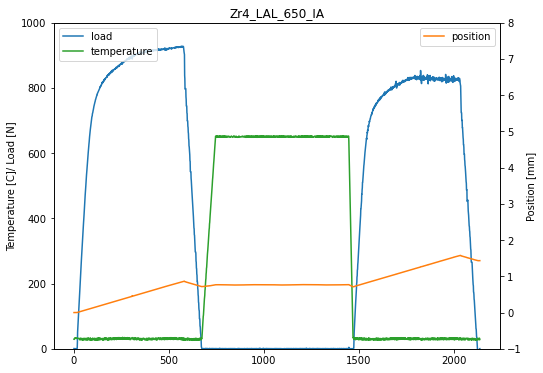

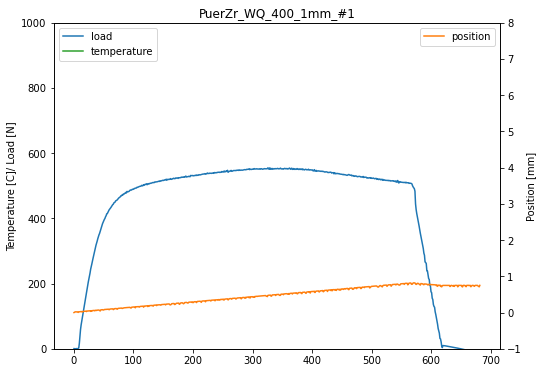

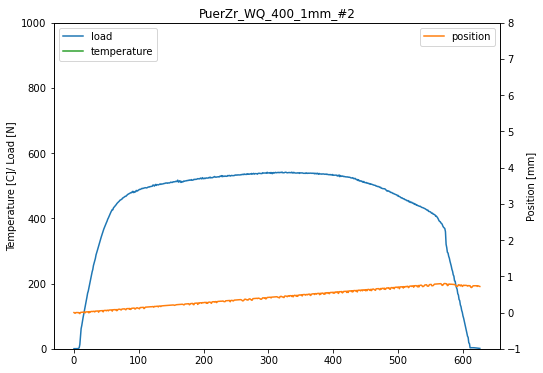

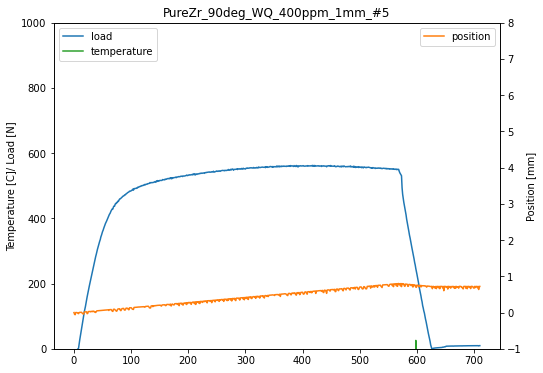

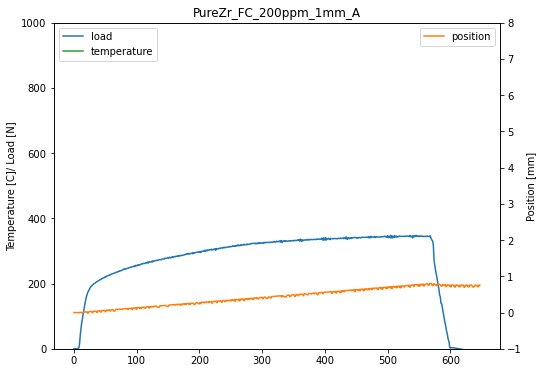

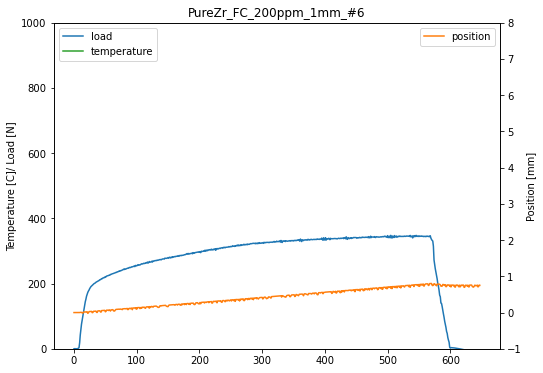

In [4]:
# pot metadata for each experiment for first check ##

for key, value in Samples.items():
    if value[0] == None:
        pass
    else:
        scanID = str(value[0])
        nxs_file = data_dir + "\\" + scanID + ".nxs"
        metadata = nxload(nxs_file)
        load = metadata.entry1.instrument.adc01_06.adc01_06
        pos = metadata.entry1.instrument.adc01_07.adc01_07
        temp = metadata.entry1.instrument.adc01_08.adc01_08

        fig, (ax) = plt.subplots(1,1, figsize=(8, 6))
        axb = ax.twinx()

        ax.plot(list(range(0,len(load))), [x*200 for x in load], color="tab:blue", label="load")
        axb.plot(list(range(0,len(pos))), [x*0.5-float(pos[0])*0.5 for x in pos], color="tab:orange", label="position")
        ax.plot(list(range(0,len(temp))), [x*150 for x in temp], color="tab:green", label="temperature")
        ax.set_title(key)
        ax.set_ylabel("Temperature [C]/ Load [N]")
        axb.set_ylabel("Position [mm]")
        ax.legend(loc="upper left")
        axb.legend(loc="upper right")
        ax.set_ylim(0,1000)
        axb.set_ylim(-1, 8)
        # ax.set_xlim(150, 180)

        plt.show(block=False)
#         plt.pause(3)